# Ejercicio 2
Realice una función en Julia que permita realizar el método de la bisección para
la ecuación x^3+4x^2-10=0. Para cada iteración deberá mostrar la evolución del

error relativo hasta llegar un criterio de término del 0.03%. Al llegar a la iteración
final, deberá graficar desde la iteración 1 hasta x, tanto el valor de m como el de

f(m), ambos en el mismo gráfico, con diferentes estilos de línea. (Puede ser una
continua y otra puntuada). Los límites iniciales, es decir, a y b serán [1, 1.5].


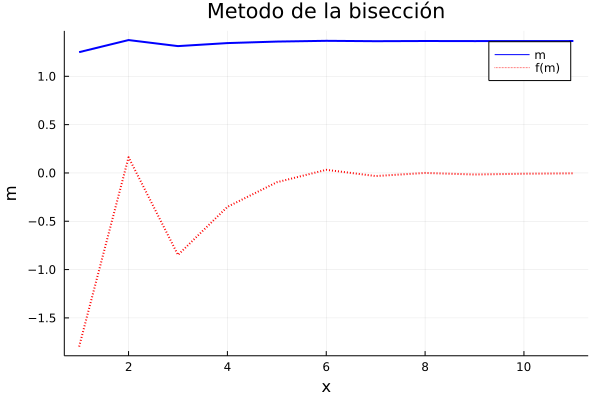

Error por iteración
Iteración 1: 0.5
Iteración 2: 0.25
Iteración 3: 0.125
Iteración 4: 0.0625
Iteración 5: 0.03125
Iteración 6: 0.015625
Iteración 7: 0.0078125
Iteración 8: 0.00390625
Iteración 9: 0.001953125
Iteración 10: 0.0009765625
Iteración 11: 0.00048828125
-------------------------
Valor de m: 1.364990234375


In [61]:
using Plots

function bisection(f::Function, a::Number, b::Number; tol:: AbstractFloat=3e-4)
    fa = f(a)
    fa*f(b) <= 0 || error("No hay raíz en [a,b]")
    i = 0
    x  = [] # [ 1:x ]
    g1 = [] # Grafica 1: valores de m
    g2 = [] # Grafica 2: valores de fm
    local m

    println("Error por iteración")
    while b - a > tol
        i += 1
        m = (a+b)/2
        fm = f(m)
        
        push!(x, i)
        push!(g1, m)
        push!(g2, fm)
        
        println("Iteración ", i, ": ", b-a )

        if fm == 0
            break
        elseif fa * fm > 0 # igual signo
            a = m # Raíz está en la mitad derecha de [a,b]
            fa = fm
        else
            b = m # Raíz está en la mitad izquierda de [a,b]
        end
    end

    # Graficar 
    plt_sin = plot(x,[g1, g2], xlabel="x", ylabel="m", title = "Metodo de la bisección", 
                color=["blue" "red"], label=["m" "f(m)"], linewidth = 2,  line = [:solid :dot], grid = true)
    
    display(plt_sin)
    println("-------------------------")
    return m
end

# FUNCION 
f(x) = x^3 + 4 * x^2 - 10

# VARIABLES
a = 1
b = 1.5

println("Valor de m: ", bisection(f, a, b))
